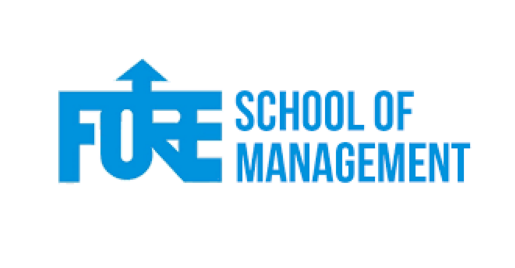

In [1]:
#Importing FSM Logo
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

image = mpimg.imread(r"C:\Users\Arnav\Desktop\FORE Documents\FORE Logo.png")
plt.axis(False)
plt.imshow(image)
plt.show()

**<font size="6">1. Dataset Selection</font>**

In [2]:
pip install --upgrade numpy scipy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [187]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [219]:
#Importing Dataset
import pandas as pd
Df = pd.read_excel(r"C:\Users\Arnav\Desktop\DLM Project\ObesityDataset.xlsx", sheet_name="Obesity_Dataset ")
Df

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2,51,165,2,1,1,3,4,1,3,1,3,1,1,4
1606,2,51,163,2,1,2,2,4,2,2,2,5,1,1,4
1607,2,52,162,1,2,1,3,4,1,3,1,4,1,1,4
1608,2,53,168,2,1,1,3,4,1,2,2,2,1,1,4


**<font size="6">2. Exploratory Data Analytics</font>**

**<font size ="4">Basic Understanding of Data</font>**

In [220]:
#Displaying Basic Information
print("Dataset Information")
Df.info()

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Sex                                1610 non-null   int64
 1   Age                                1610 non-null   int64
 2   Height                             1610 non-null   int64
 3   Overweight_Obese_Family            1610 non-null   int64
 4   Consumption_of_Fast_Food           1610 non-null   int64
 5   Frequency_of_Consuming_Vegetables  1610 non-null   int64
 6   Number_of_Main_Meals_Daily         1610 non-null   int64
 7   Food_Intake_Between_Meals          1610 non-null   int64
 8   Smoking                            1610 non-null   int64
 9   Liquid_Intake_Daily                1610 non-null   int64
 10  Calculation_of_Calorie_Intake      1610 non-null   int64
 11  Physical_Excercise                 1610 non-null   int64
 12  

In [221]:
#Displaying Summary Statistics
print("Summary Statistics")
print(Df.describe().transpose())

Summary Statistics
                                    count        mean       std    min    25%  \
Sex                                1610.0    1.557764  0.496806    1.0    1.0   
Age                                1610.0   33.115528  9.835076   18.0   25.0   
Height                             1610.0  167.741615  7.979873  150.0  161.0   
Overweight_Obese_Family            1610.0    1.834783  0.371492    1.0    2.0   
Consumption_of_Fast_Food           1610.0    1.729193  0.444515    1.0    1.0   
Frequency_of_Consuming_Vegetables  1610.0    2.063354  0.746043    1.0    2.0   
Number_of_Main_Meals_Daily         1610.0    1.872050  0.638345    1.0    1.0   
Food_Intake_Between_Meals          1610.0    2.395652  1.010501    1.0    2.0   
Smoking                            1610.0    1.694410  0.460800    1.0    1.0   
Liquid_Intake_Daily                1610.0    2.108696  0.814710    1.0    1.0   
Calculation_of_Calorie_Intake      1610.0    1.822360  0.382328    1.0    2.0   
Physical_

Demographics:

> Average age is 33, with most individuals between 25-41 years.

> Average height is 167.7 cm, ranging from 150 cm to 193 cm.

Health & Eating Habits:

> Fast food consumption is moderate (1.72/2), while vegetable intake is around 2/3.

> Snacking (2.39/4) may have a stronger impact on obesity than fast food.

> Most people eat 2 meals/day and drink 2L of liquids daily.

Lifestyle & Behavior:

> Physical activity is moderate (3.26/5), with some individuals highly active.

> Technology usage is ~2 hours/day, potentially impacting exercise.

> Transportation is mixed, with some using active modes (walking/cycling) and others sedentary (cars).

Obesity Trends:

> Mean obesity class is 2.67 (between normal weight and overweight).

> A deeper look at transportation, exercise, and snacking may reveal stronger obesity predictors.

In [222]:
#Displaying First Few Rows
print(Df.head())

   Sex  Age  Height  Overweight_Obese_Family  Consumption_of_Fast_Food  \
0    2   18     155                        2                         2   
1    2   18     158                        2                         2   
2    2   18     159                        2                         2   
3    2   18     162                        2                         2   
4    2   18     165                        2                         1   

   Frequency_of_Consuming_Vegetables  Number_of_Main_Meals_Daily  \
0                                  3                           1   
1                                  3                           1   
2                                  2                           1   
3                                  2                           2   
4                                  2                           1   

   Food_Intake_Between_Meals  Smoking  Liquid_Intake_Daily  \
0                          3        2                    1   
1                     

**<font size ="4">Variable Relationship Analysis</font>**

In [223]:
#Setting a visualization style
plt.style.use("ggplot")

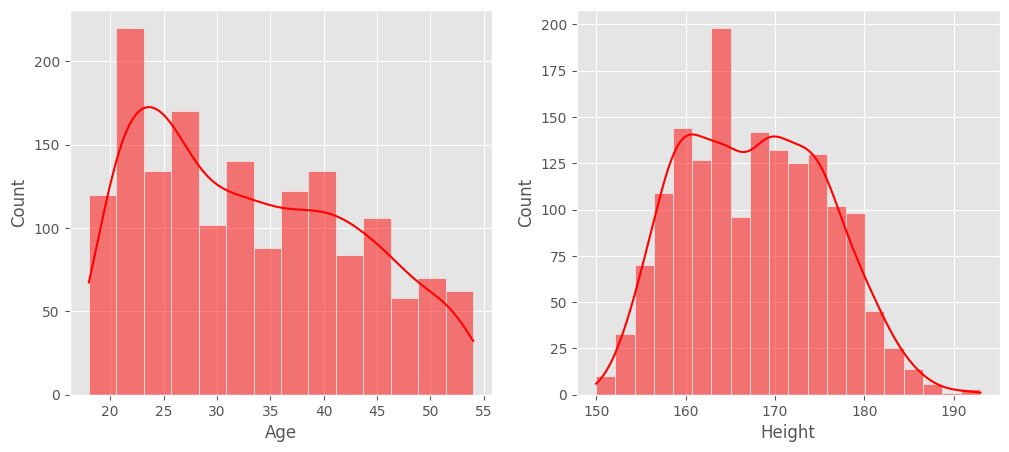

In [224]:
#Visualizing Age & Height
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data = Df, x = 'Age', kde= True, color = 'red' )
plt.subplot(1,2,2)
sns.histplot(data = Df, x = 'Height', kde= True, color = 'red' );

**Age Distribution (Left Chart)**

The dataset is skewed towards younger individuals, with a peak around 22-25 years.

There is a gradual decline in frequency as age increases, meaning fewer older individuals are represented.

This suggests that most of the dataset comprises young to middle-aged adults, which could impact obesity trends differently across age groups.

**Height Distribution (Right Chart)**

The height distribution is fairly normal, peaking around 165-170 cm.

A few individuals are above 180 cm, but the frequency drops significantly beyond that.

This suggests a balanced mix of average-height individuals, making BMI calculations reliable for further analysis.

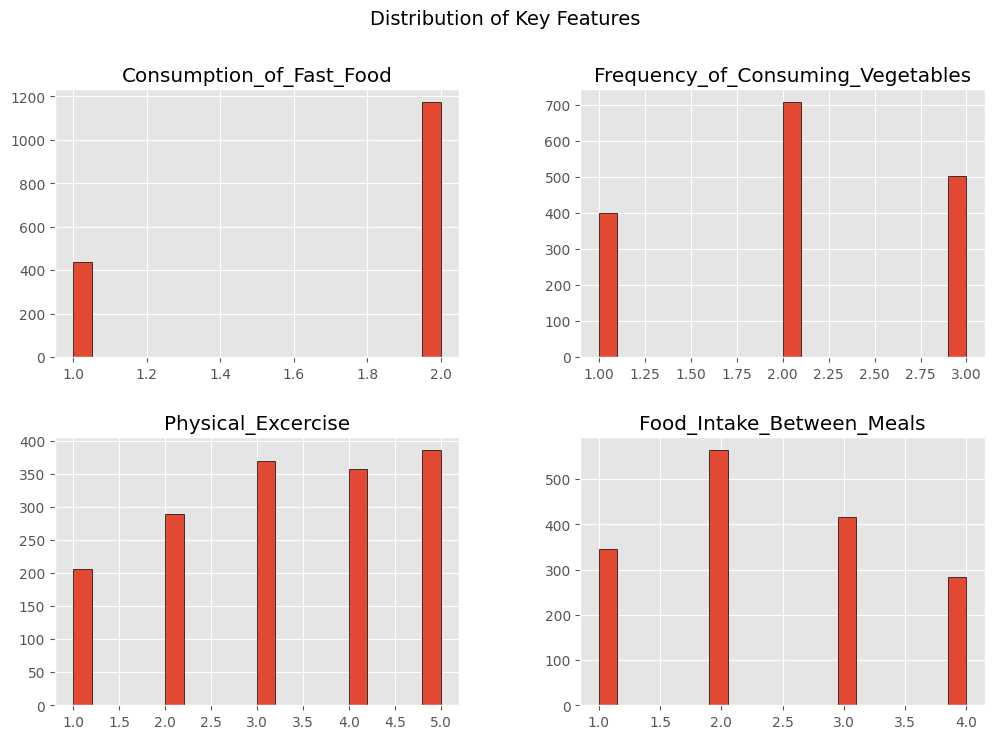

In [225]:
#Plotting Distribution of Key Numerical Variables
numeric_features = ['Consumption_of_Fast_Food', 
                    'Frequency_of_Consuming_Vegetables', 'Physical_Excercise', 'Food_Intake_Between_Meals']

Df[numeric_features].hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Distribution of Key Features", fontsize=14)
plt.show()

**Fast Food Consumption (Top-Left)**

Most individuals have a high fast food consumption level (2) compared to low consumption (1).

This suggests that fast food is a common part of the diet in this dataset, which may correlate with obesity trends.

**Vegetable Consumption (Top-Right)**

The majority consume vegetables moderately (2), while a significant portion has high vegetable intake (3).

A smaller group has low vegetable intake (1), which could be a risk factor for obesity.

**Physical Exercise (Bottom-Left)**

Exercise levels are evenly distributed, with peaks around levels 3, 4, and 5.

This indicates that the population has a mix of active and less active individuals, allowing for good variation in obesity predictions.

**Food Intake Between Meals (Bottom-Right)**

Snacking frequency is highest at level 2, followed by level 3 and 1.

Since snacking plays a crucial role in weight gain, further analysis should compare this with obesity classes to understand its impact.

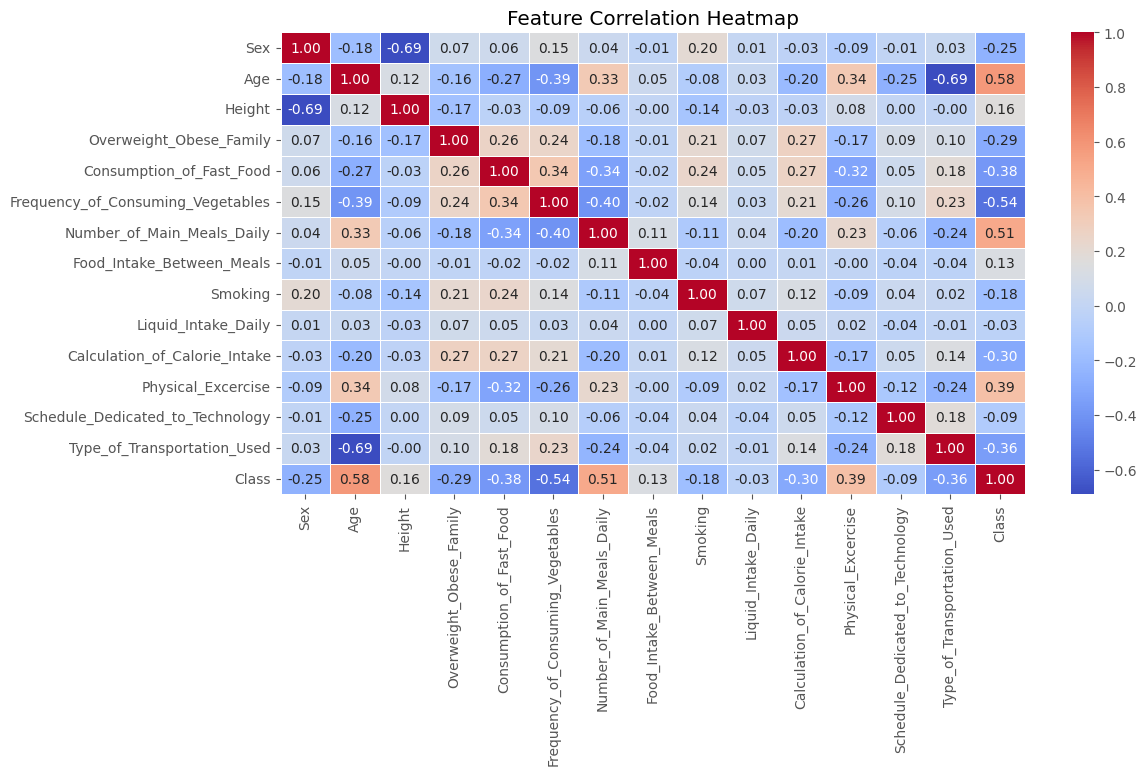

In [226]:
#Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(Df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**1. Strongest Correlations with Obesity Class (Class)**

Age (0.58): Older individuals tend to have higher obesity levels.

Food Intake Between Meals (0.51): Frequent snacking is highly correlated with obesity.

Consumption of Fast Food (-0.38): Higher fast food consumption tends to be associated with lower obesity levels. (This might indicate that highly obese individuals eat less fast food due to dietary restrictions.)

Physical Exercise (-0.30): More exercise is linked to lower obesity levels.

**2. Other Notable Relationships**|

Vegetable Consumption (-0.54 with Class): Higher vegetable intake is linked to lower obesity levels.

Overweight_Obese_Family (0.29): Having a family history of obesity is moderately correlated with obesity.

Technology Use (-0.36): More time spent on technology is slightly correlated with lower obesity levels.

**<font size ="4">Business Metrics Analysis</font>**

C:\Users\Arnav\AppData\Local\Temp\ipykernel_5656\2810049045.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Df["Class"], palette="muted")


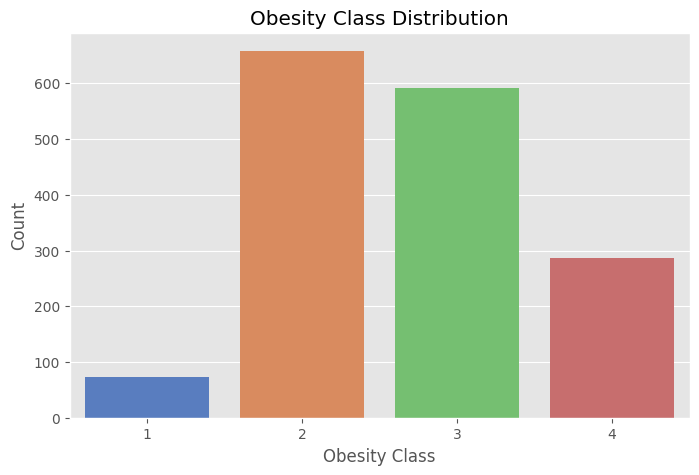

In [227]:
#Visualizing Obesity Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=Df["Class"], palette="muted")
plt.title("Obesity Class Distribution")
plt.xlabel("Obesity Class")
plt.ylabel("Count")
plt.show()

Class 2 has the highest count, suggesting it represents the majority of individuals in this dataset.

Class 3 follows, with a lower count than Class 2.

Class 4 has an even lower count, showing a smaller population in that category.

Class 1 has the least count, making it the least common category in the dataset.

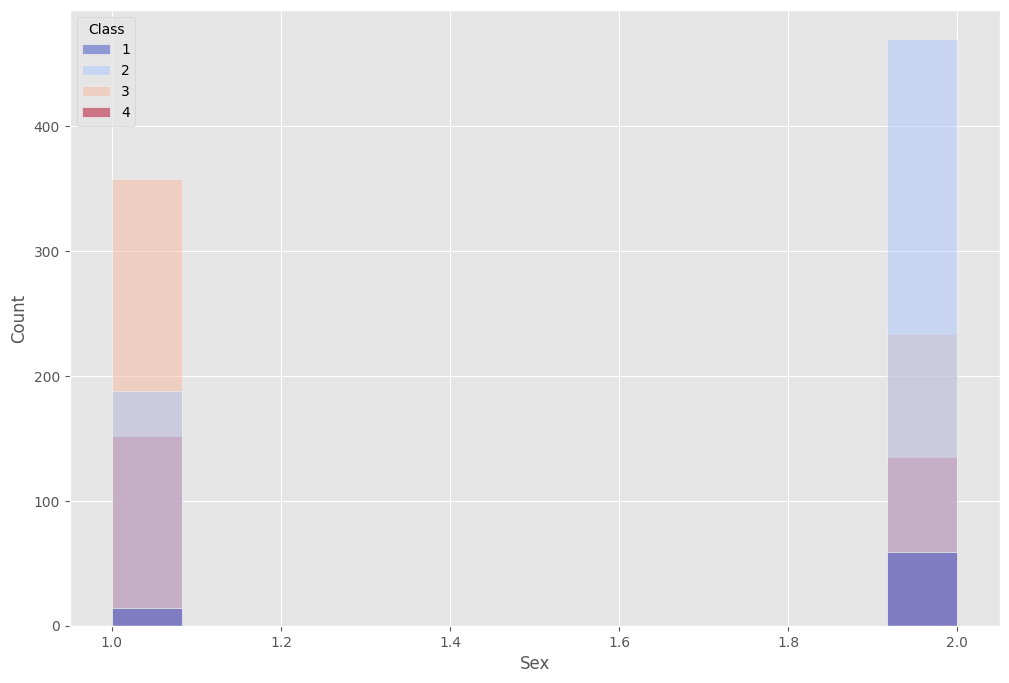

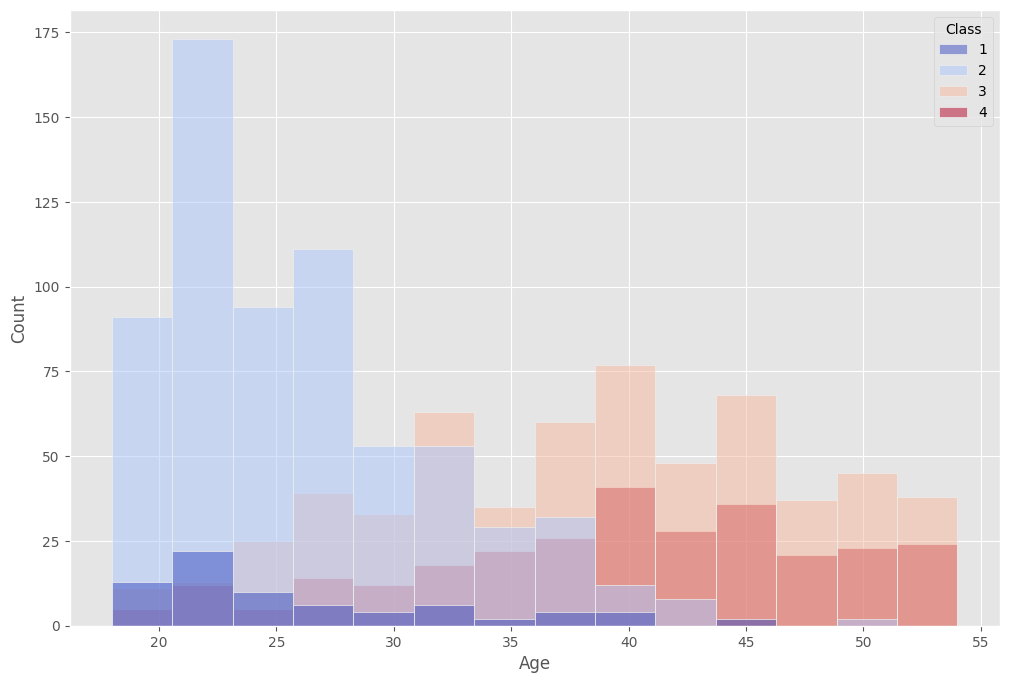

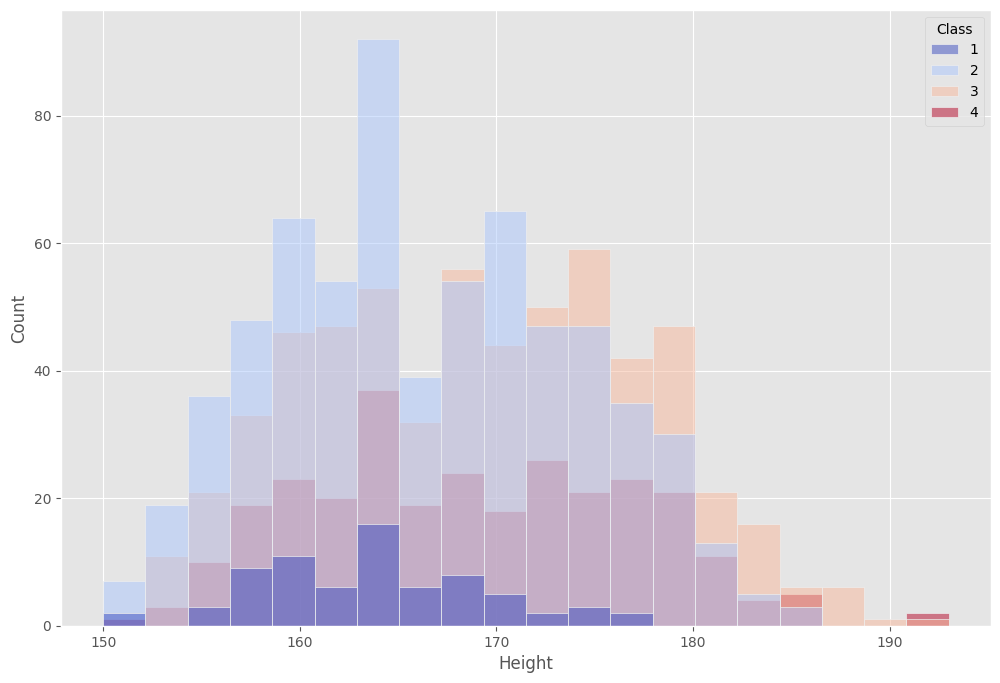

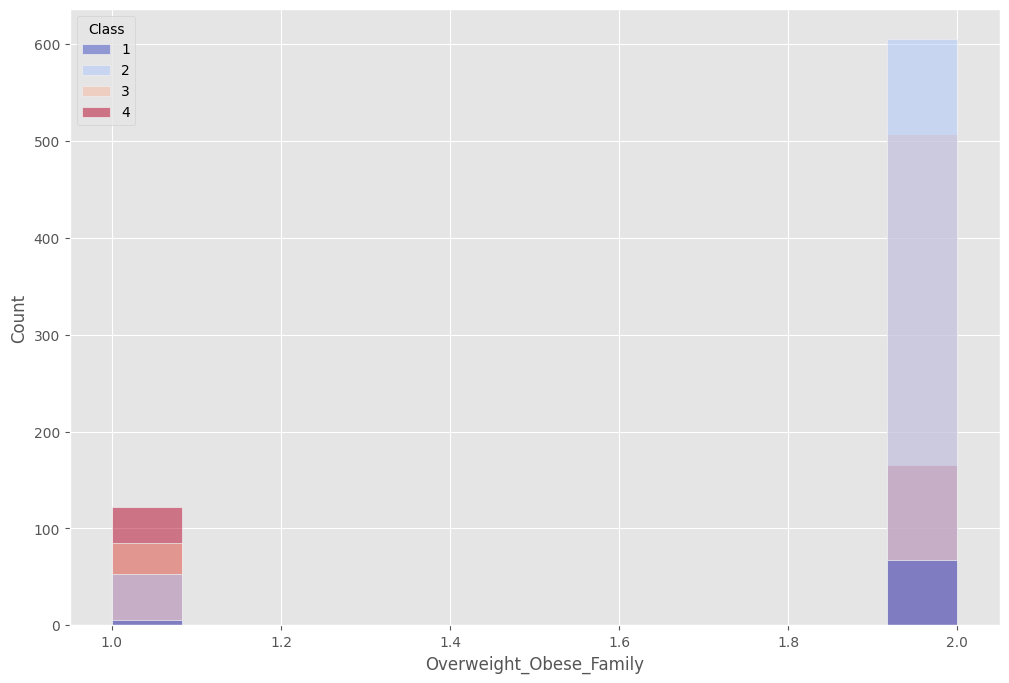

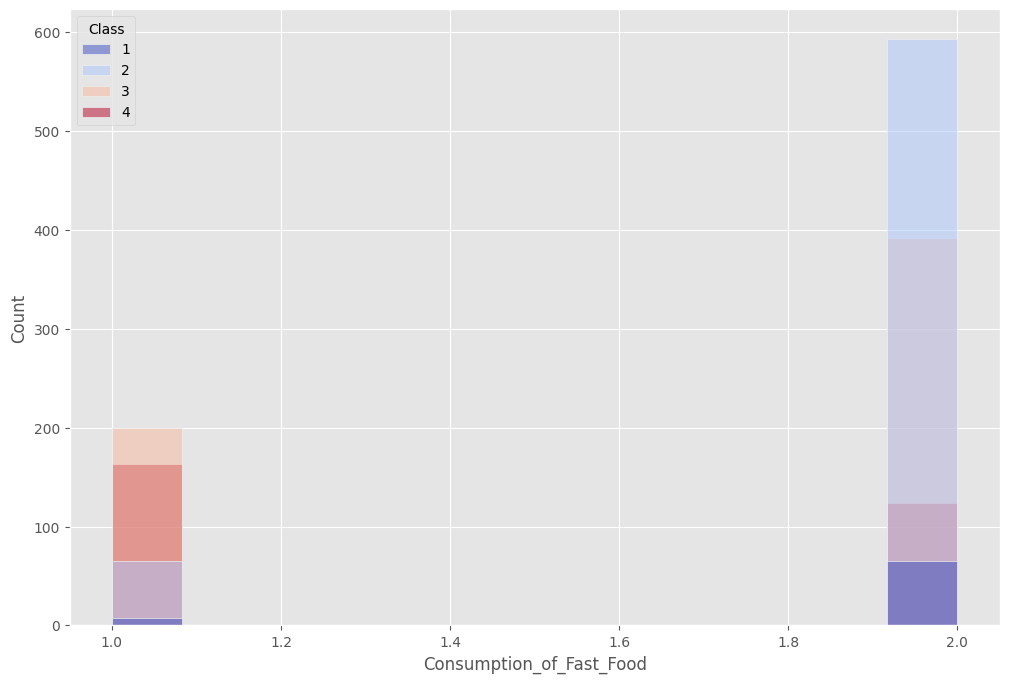

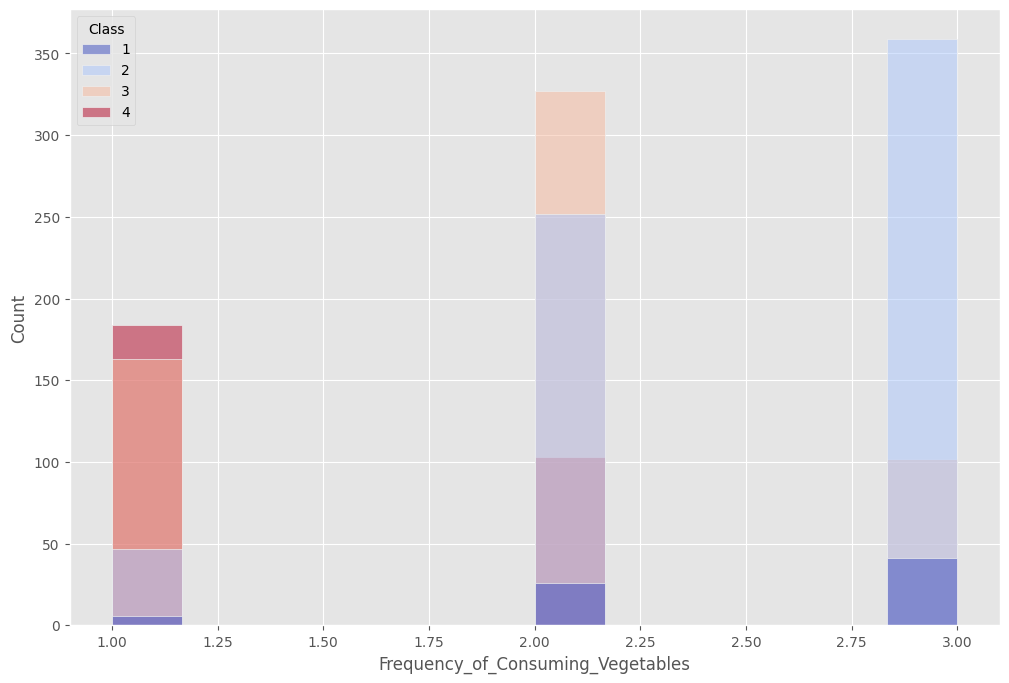

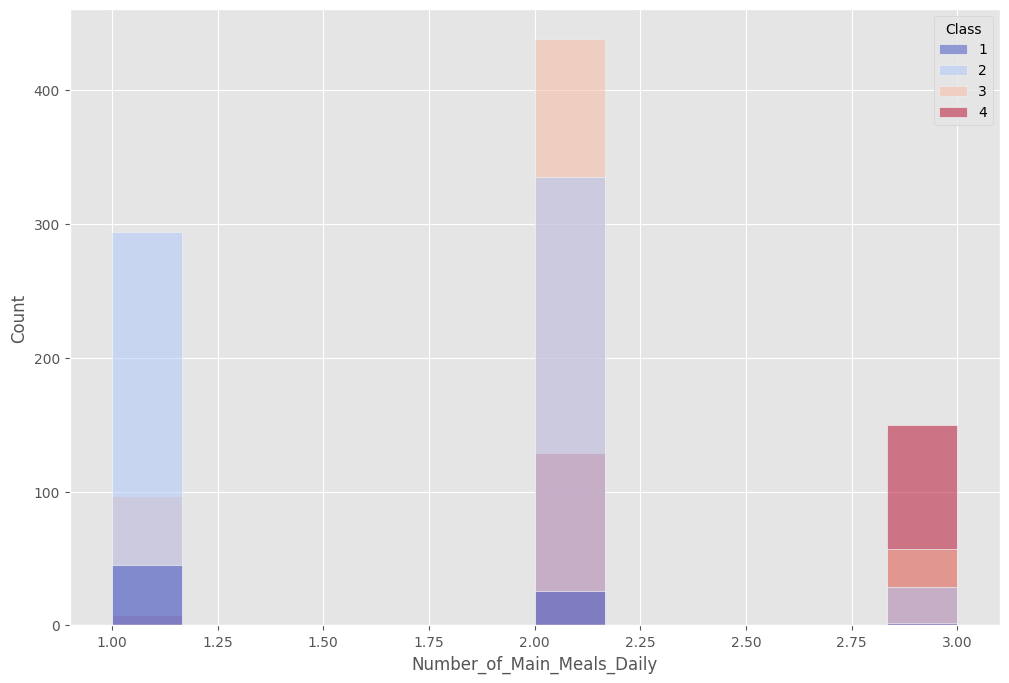

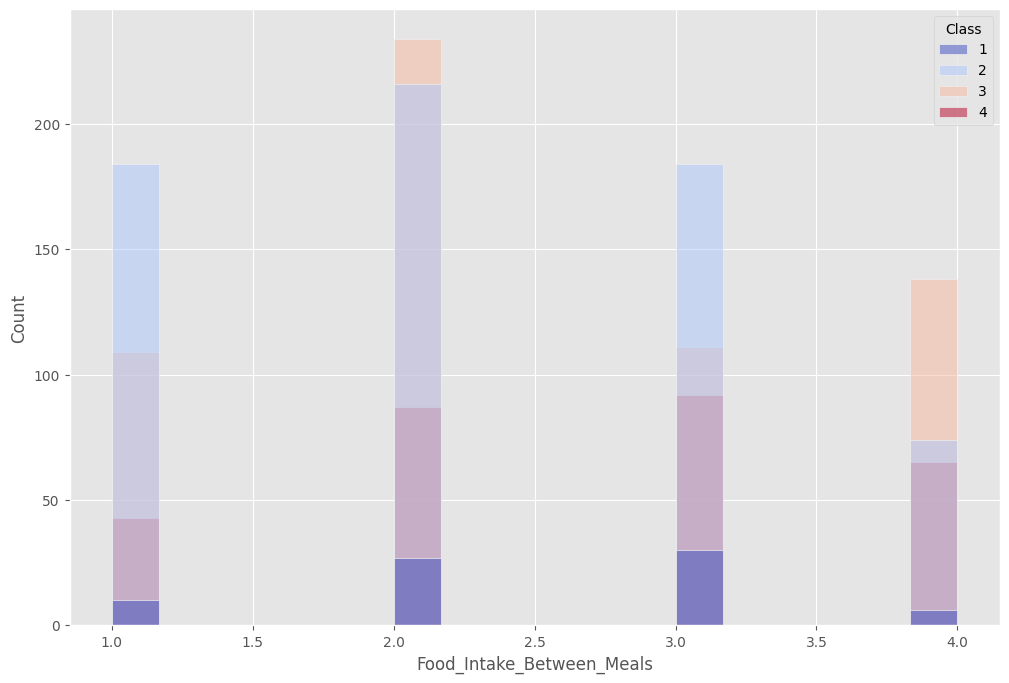

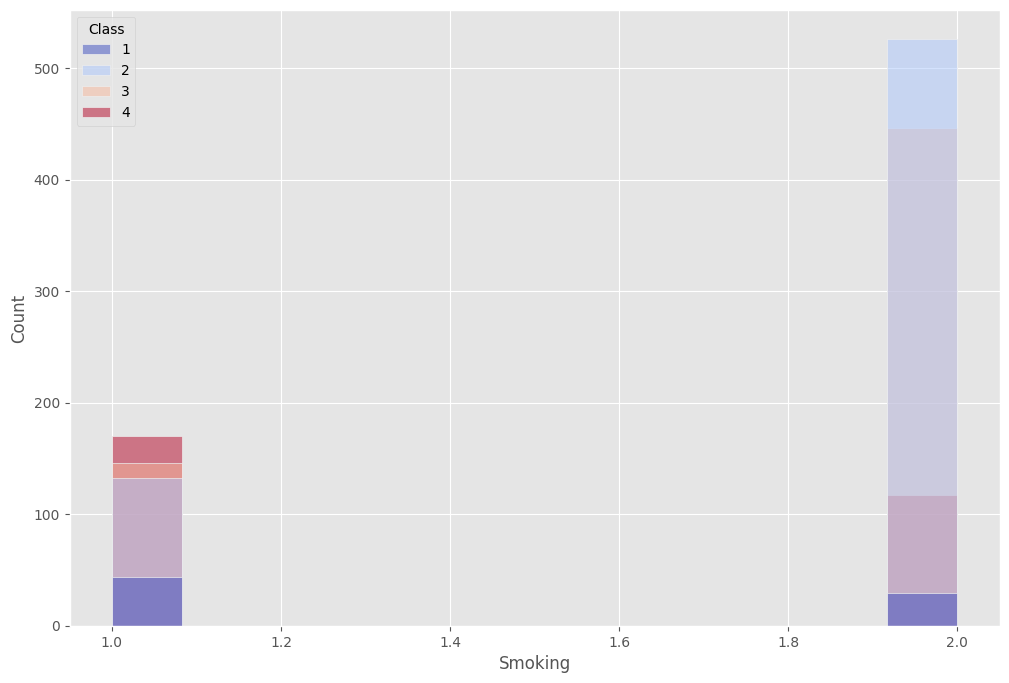

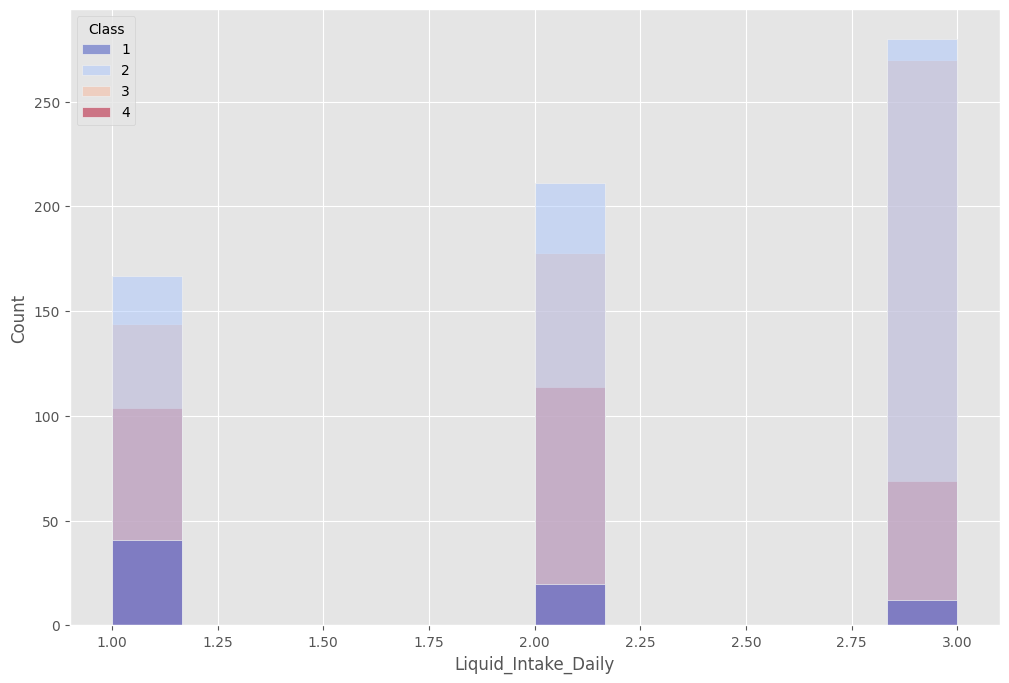

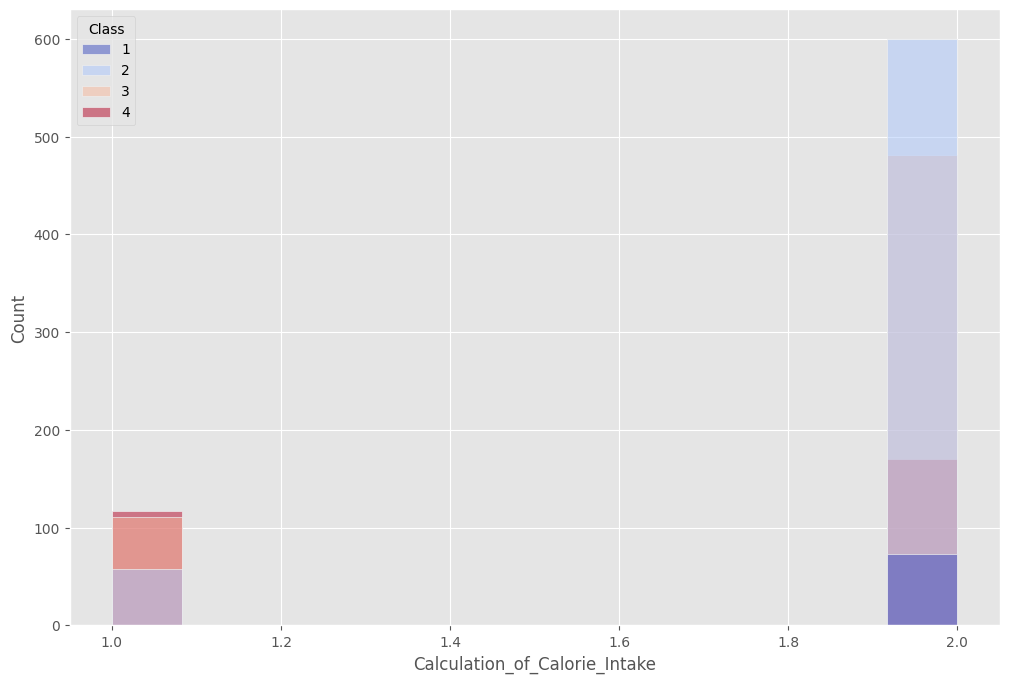

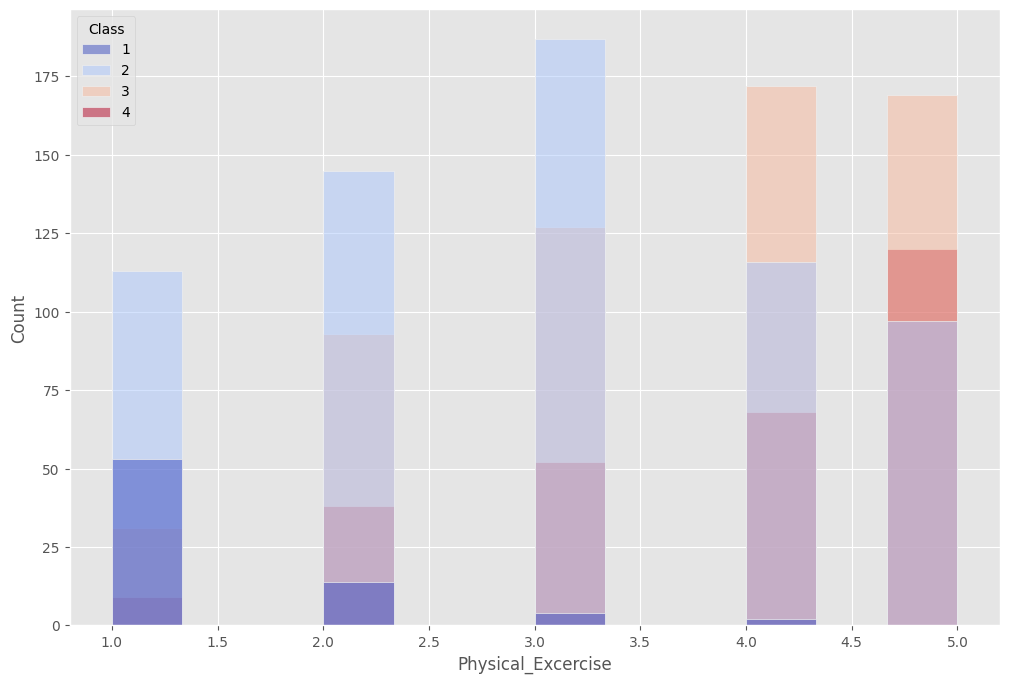

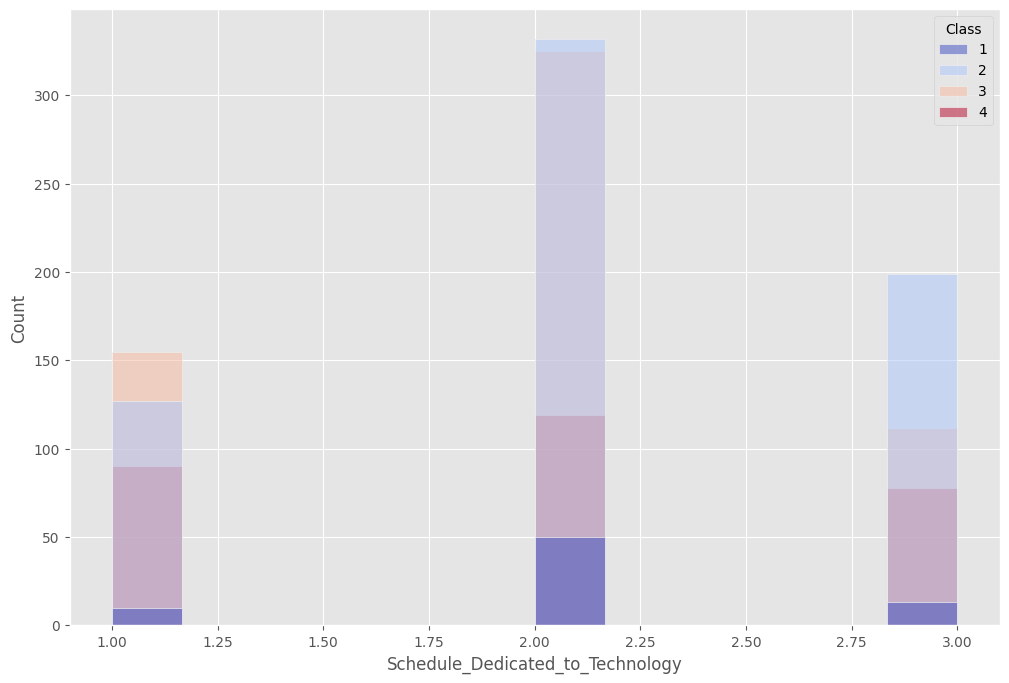

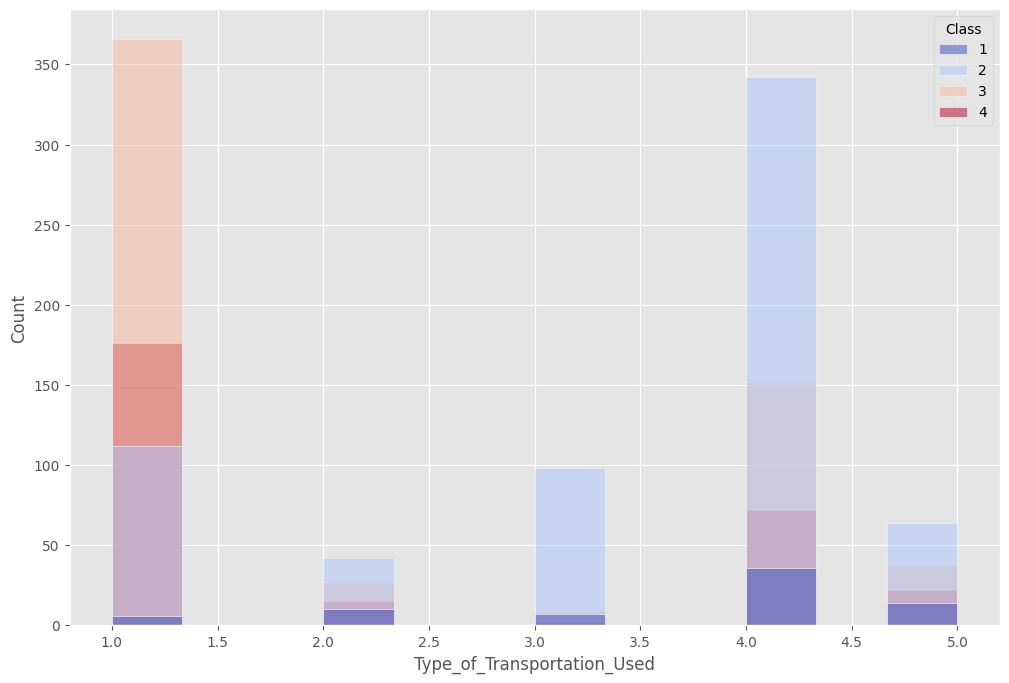

In [228]:
#Visualizing Class w.r.t other variables
for i in Df.iloc[:,:-1].columns:
    plt.figure(figsize=(12,8))
    sns.histplot(data = Df, x = i , hue = 'Class', palette = 'coolwarm')
    plt.show()

**<font size ="4">Dataset Trends</font>**

C:\Users\Arnav\AppData\Local\Temp\ipykernel_5656\2702014547.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=Df['Age'], y=Df['Consumption_of_Fast_Food'], ci=None)


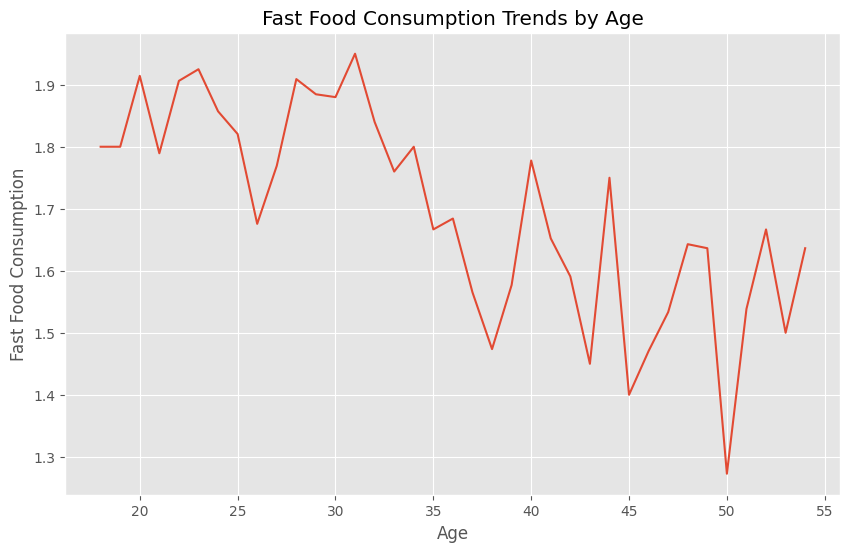

In [229]:
#Fast Food Consumption Trends By Age
plt.figure(figsize=(10, 6))
sns.lineplot(x=Df['Age'], y=Df['Consumption_of_Fast_Food'], ci=None)
plt.title("Fast Food Consumption Trends by Age")
plt.xlabel("Age")
plt.ylabel("Fast Food Consumption")
plt.show()

**1. Consumption Trends by Age:**

Fast food consumption is relatively high in individuals aged 20–30.

There is a noticeable dip in consumption around the age of 35–40.

After the age of 40, the trend fluctuates, but overall, fast food consumption remains lower compared to younger age groups.



**2. Peak Consumption:**

The highest levels of fast food consumption are observed in the 20–25 age group, indicating that younger individuals are the primary consumers.



**3. Decline with Age:**

There is a gradual decline in fast food consumption after the mid-30s, suggesting that older age groups may prefer healthier or alternative food options.


C:\Users\Arnav\AppData\Local\Temp\ipykernel_5656\3614586195.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=Df['Age'], y=Df['Physical_Excercise'], ci=None)


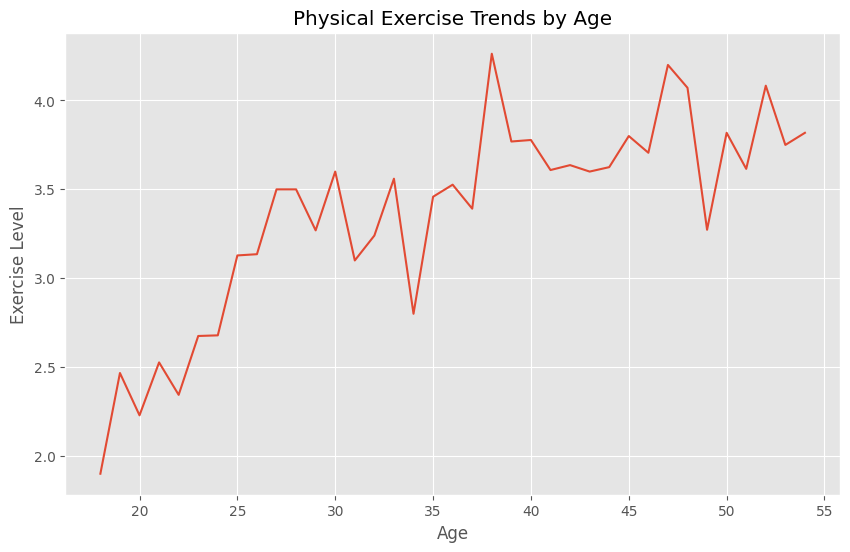

In [230]:
#Physical Exercise Trends By Age
plt.figure(figsize=(10, 6))
sns.lineplot(x=Df['Age'], y=Df['Physical_Excercise'], ci=None)
plt.title("Physical Exercise Trends by Age")
plt.xlabel("Age")
plt.ylabel("Exercise Level")
plt.show()

**Exercise Trends Across Age Groups:**

Physical exercise levels increase steadily from ages 20 to 35.

From 35 to 50, exercise levels fluctuate but remain relatively high, showing a sustained interest in fitness in middle-aged individuals.

The peak exercise levels are observed around ages 30–40.


C:\Users\Arnav\AppData\Local\Temp\ipykernel_5656\3193570248.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=Df['Age'], y=Df['Liquid_Intake_Daily'], ci=None)


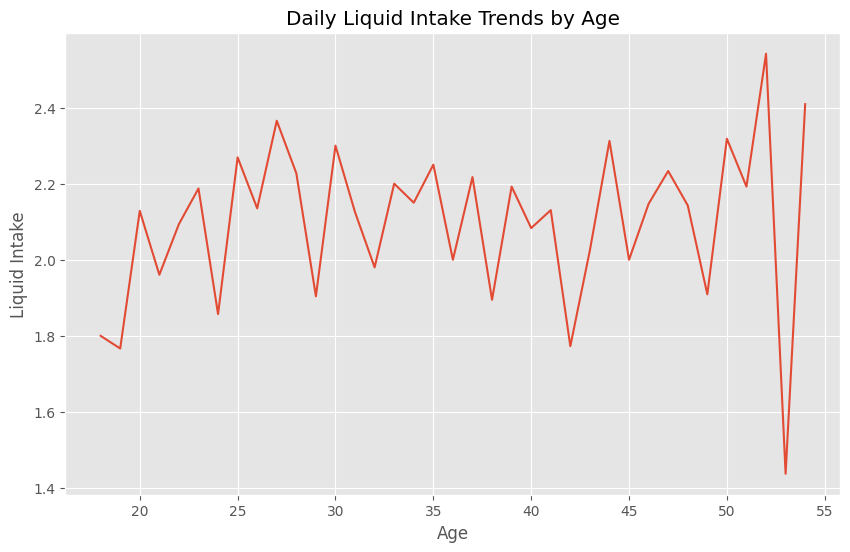

In [231]:
#Daily Liquid Intake Trends By Age
plt.figure(figsize=(10, 6))
sns.lineplot(x=Df['Age'], y=Df['Liquid_Intake_Daily'], ci=None)
plt.title("Daily Liquid Intake Trends by Age")
plt.xlabel("Age")
plt.ylabel("Liquid Intake")
plt.show()

**General Trend**

Liquid intake fluctuates across all age groups, showing no clear upward or downward pattern.

The average liquid intake hovers around 2.0 to 2.4 liters daily, with occasional dips.

**Age-Related Variability**

Younger individuals (18-30 years) show moderate fluctuations but generally maintain a consistent intake of ~2.0–2.3L.

Ages 30-45 exhibit more fluctuations, possibly due to lifestyle or dietary changes.

Older individuals (45-55 years) show sharp variations, possibly due to health concerns, metabolism shifts, or medical recommendations.

**Key Observations**

Some spikes in liquid intake appear among individuals in their late 40s and early 50s, suggesting they may consume more water due to health consciousness.

The sudden drop at around age 53 could indicate outliers or lower representation of older individuals in the dataset.

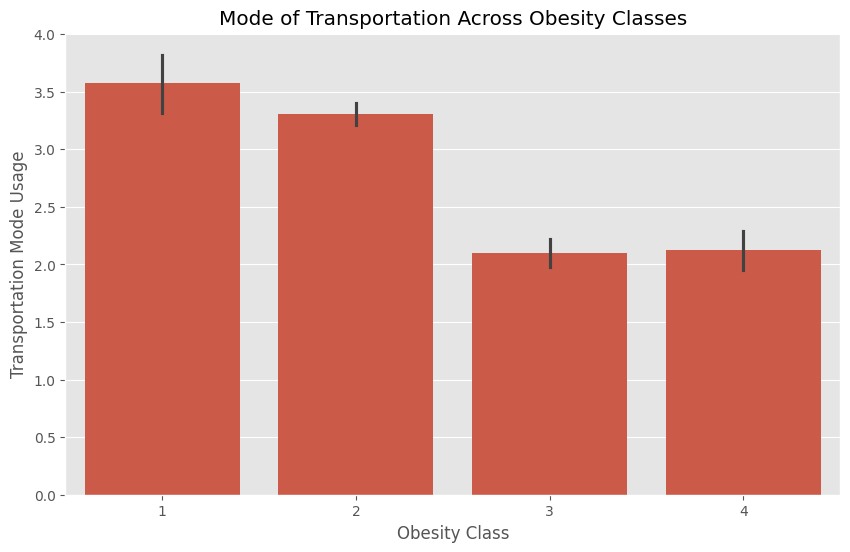

In [232]:
#Mode of Transportation Across Obesity Classes
plt.figure(figsize=(10, 6))
sns.barplot(x=Df['Class'], y=Df['Type_of_Transportation_Used'])
plt.title("Mode of Transportation Across Obesity Classes")
plt.xlabel("Obesity Class")
plt.ylabel("Transportation Mode Usage")
plt.show()

**Higher Transportation Mode Usage in Lower Obesity Classes**

Class 1 (Underweight) and Class 2 (Normal Weight) individuals use transportation modes more frequently (3.5 - 3.2 average usage).

This suggests they may engage in active transportation (e.g., walking, cycling) more than those in higher obesity classes.

**Lower Transportation Usage in Higher Obesity Classes**

Class 3 (Overweight) and Class 4 (Obese) individuals have significantly lower transportation mode usage (~2.1).

This could indicate a preference for more sedentary transport (e.g., cars, public transport) or limited mobility.

**<font size="6">3. Multi-Layer Neural Networks</font>**

In [233]:
#Splitting Dataset into Features & Target
X = Df.drop(columns=['Class'])
y = Df['Class'] - 1

In [234]:
#Splitting Into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [235]:
#Scaling Numerical Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [236]:
#Define MLP Model For Multi-Class Classification
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(len(y.unique()), activation='softmax')  # Multi-class output
])

C:\Users\Arnav\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [240]:
#Compile The Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [241]:
#Train The Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3870 - loss: 1.5636 - val_accuracy: 0.6615 - val_loss: 1.0972
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6302 - loss: 0.9822 - val_accuracy: 0.7143 - val_loss: 0.9436
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6678 - loss: 0.8873 - val_accuracy: 0.7298 - val_loss: 0.8331
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6855 - loss: 0.7924 - val_accuracy: 0.7422 - val_loss: 0.7681
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7187 - loss: 0.7324 - val_accuracy: 0.7640 - val_loss: 0.6997
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7258 - loss: 0.6986 - val_accuracy: 0.7764 - val_loss: 0.6656
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7218 - loss: 0.7150 - val_accuracy: 0.7547 - val_loss: 0.6453
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7568 - loss: 0.6500 - val_accuracy: 0.7484 - v

In [242]:
#Evaluate Model Performance
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7840 - loss: 0.5541 
Test Accuracy: 0.8012


**<font size="6">4. Model Evaluation</font>**

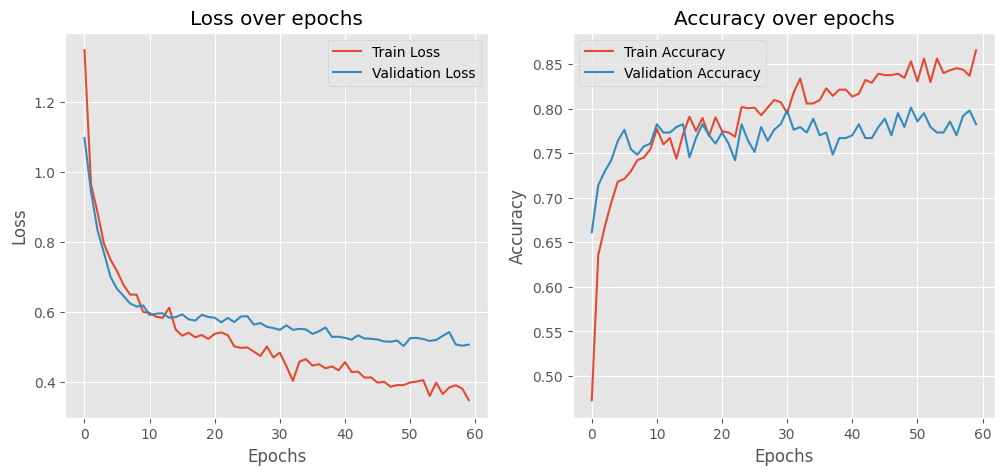

In [243]:
#Plot Training History
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**1. Loss Over Epochs (Left Plot)**

Train loss decreases steadily, indicating the model is learning well from the training data.

Validation loss also decreases initially but plateaus around epoch 20-30, showing that the model is approaching its best performance.

Slight gap between training and validation loss suggests minor overfitting, but it is not extreme.

**2. Accuracy Over Epochs (Right Plot)**

Train accuracy consistently increases, reaching around 85% by the end.

Validation accuracy stabilizes around 78-80%, slightly lower than training accuracy, again indicating minor overfitting.

The accuracy is not fluctuating too much, meaning training is stable.

In [244]:
#Get raw probabilities for each class
y_prob = model.predict(X_test)  

#Convert probabilities to class labels
#For multi-class classification with softmax output:
y_pred = np.argmax(y_prob, axis=1)  

#Print some predictions vs actual labels (optional)
for i in range(5):
    print(f"Sample {i} -> Predicted class: {y_pred[i]}, Actual class: {y_test.iloc[i]}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Sample 0 -> Predicted class: 2, Actual class: 2
Sample 1 -> Predicted class: 1, Actual class: 1
Sample 2 -> Predicted class: 0, Actual class: 0
Sample 3 -> Predicted class: 1, Actual class: 1
Sample 4 -> Predicted class: 2, Actual class: 3


In [245]:
pred_prob = model.predict(X_test)  
y_pred = np.argmax(pred_prob, axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [246]:
#Classification Report
from sklearn.metrics import classification_report

print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.86      0.89      0.87       132
           2       0.78      0.74      0.76       118
           3       0.70      0.75      0.73        57

    accuracy                           0.80       322
   macro avg       0.81      0.76      0.78       322
weighted avg       0.80      0.80      0.80       322



**Accuracy**: 80% → The model correctly predicts the obesity class 80% of the time.

**Macro Avg F1-Score**: 0.78 → The model has balanced performance across all classes, but some classes perform better than others.

**Weighted Avg F1-Score**: 0.80 → Since class distribution is imbalanced, this is a more realistic measure of performance, and it aligns with accuracy.

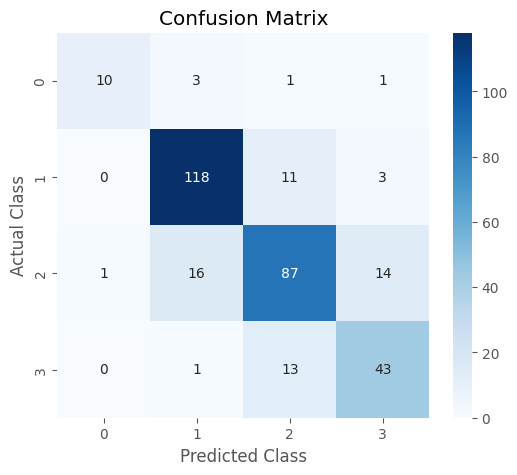

In [247]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

**Overall Performance**

The model correctly classifies most instances, but there are some misclassifications, especially between adjacent obesity classes (e.g., Class 2 vs. Class 3).

The strong diagonal presence indicates that the model is performing well, but some categories (e.g., overweight and obese) have notable misclassifications.

✅ Class 1 (Normal weight) is classified with the highest accuracy.

⚠️ Class 2 (Overweight) and Class 3 (Obese) are frequently confused.

⚠️ Underweight individuals are sometimes misclassified as normal weight.

In [248]:
#AUC (Area Under The ROC Curve) For Multi-Class
from sklearn.preprocessing import label_binarize

# Binarize the labels
num_classes = len(np.unique(y_test))
y_test_binarized = label_binarize(y_test, classes=range(num_classes))

# Calculate macro-average AUC
auc_score = roc_auc_score(y_test_binarized, pred_prob, average='macro', multi_class='ovr')
print(f"\nMacro-Averaged AUC: {auc_score:.4f}")


Macro-Averaged AUC: 0.9472


This focuses on calculating the Area Under the Curve (AUC) for a multi-class classification problem using One-vs-Rest (OVR) strategy. The label_binarize function from sklearn.preprocessing is used to convert categorical labels into binary format. The macro-averaged AUC score is then computed using roc_auc_score, resulting in a value of 0.9472, indicating strong model performance.

**<font size="6">5. Feature Engineering</font>**

In [249]:
#Category Binning
bins = [0, 12, 18, 30, 50, 100]
labels = ['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior']
Df['AgeGroup'] = pd.cut(Df['Age'], bins=bins, labels=labels)

#Encode Newly Created Categorical Columns
Df = pd.get_dummies(Df, columns=['AgeGroup'], drop_first=True)

In [250]:
#Creating Interactions
Df['FastFood_Exercise'] = Df['Consumption_of_Fast_Food'] * Df['Physical_Excercise']

In [251]:
cor_threshold = 0.05

In [252]:
corr_matrix = Df.corr()
corr_with_target = corr_matrix['Class'].abs().sort_values(ascending=False)
print("Correlation with 'Class' (absolute)", corr_with_target)

low_corr_cols = corr_with_target[corr_with_target < cor_threshold].index.tolist()
if 'Class' in low_corr_cols:
    low_corr_cols.remove('Class')  #Never drop the target

print("Dropping low-correlation features (|corr| < {cor_threshold}): {low_corr_cols}")
Df.drop(columns=low_corr_cols, inplace=True)

Correlation with 'Class' (absolute) Class                                1.000000
Age                                  0.579812
Frequency_of_Consuming_Vegetables    0.544496
Number_of_Main_Meals_Daily           0.509390
AgeGroup_YoungAdult                  0.495674
AgeGroup_Adult                       0.433125
Physical_Excercise                   0.389355
Consumption_of_Fast_Food             0.380463
Type_of_Transportation_Used          0.356772
Calculation_of_Calorie_Intake        0.300546
Overweight_Obese_Family              0.292041
Sex                                  0.252446
AgeGroup_Senior                      0.201879
Smoking                              0.178526
Height                               0.161563
AgeGroup_Teen                        0.141483
FastFood_Exercise                    0.130187
Food_Intake_Between_Meals            0.129327
Schedule_Dedicated_to_Technology     0.091224
Liquid_Intake_Daily                  0.031608
Name: Class, dtype: float64
Dropping low-cor

**1. Correlation Analysis:**

Features like Age (0.5798), Frequency of Consuming Vegetables (0.5445), and Number of Main Meals Daily (0.5099) show relatively strong correlations with the target.

Other features, such as Liquid Intake Daily (0.0619) and Schedule Dedicated to Technology (0.0918), have very weak correlations.



**2. Feature Selection:**

The script removes low-correlation features based on a threshold, ensuring that only relevant predictors remain in the dataset.

This step is crucial for dimensionality reduction, improving model performance, and reducing overfitting.


In [253]:
#Splitting Data Again (Features & Target)
X = Df.drop(columns=['Class'])
y = Df['Class'] - 1

In [254]:
#Splitting Data Again (Testing & Training)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [255]:
#Define MLP Model For Multi-Class Classification
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    # Multi-class output
    Dense(len(y.unique()), activation='softmax')
])

#Compiling Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

C:\Users\Arnav\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [256]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [257]:
#Training Model
history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4057 - loss: 1.4770 - val_accuracy: 0.6957 - val_loss: 0.9872
Epoch 2/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6469 - loss: 0.9059 - val_accuracy: 0.7236 - val_loss: 0.8546
Epoch 3/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6815 - loss: 0.8171 - val_accuracy: 0.7205 - val_loss: 0.7722
Epoch 4/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6963 - loss: 0.7889 - val_accuracy: 0.7112 - val_loss: 0.7428
Epoch 5/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7398 - loss: 0.6806 - val_accuracy: 0.7236 - val_loss: 0.6997
Epoch 6/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7498 - loss: 0.6517 - val_accuracy: 0.7547 - val_loss: 0.6627
Epoch 7/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7594 - loss: 0.6131 - val_accuracy: 0.7547 - val_loss: 0.6616
Epoch 8/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7595 - loss: 0.6109 - val_accuracy: 0.7578 - v

In [258]:
#Refined Model Accuracy
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nRefined Model - Test Accuracy: {accuracy:.4f}")


Refined Model - Test Accuracy: 0.8230


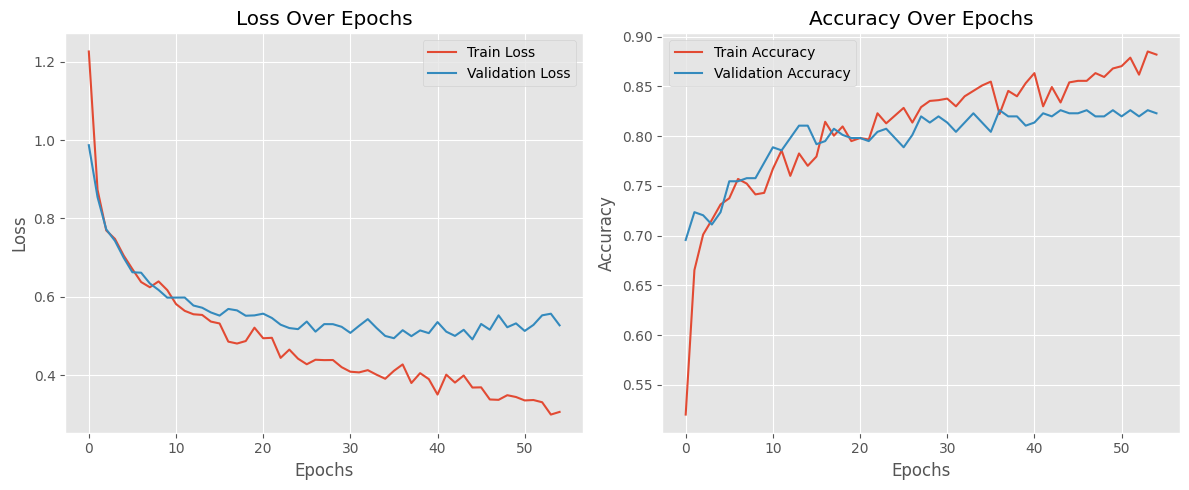

In [259]:
#Refined Plot Training History
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

**1. Loss Over Epochs (Left Plot)**

Train loss consistently decreases, indicating the model is learning well.

Validation loss plateaus and fluctuates after epoch ~20, suggesting the model is starting to overfit.

The increasing gap between training and validation loss after epoch 20-30 suggests that the model is memorizing training data rather than generalizing.

**2. Accuracy Over Epochs (Right Plot)**

Training accuracy keeps improving, reaching nearly 90%, while validation accuracy stabilizes around 80%.

Training accuracy surpasses validation accuracy after ~25 epochs, which again indicates overfitting.

The small fluctuations in validation accuracy suggest that the model's performance is stable but not improving much after a certain point.

**<font size="6">6. Suggestions For Future Insights</font>**

**<font size="4">Future Areas for Analysis or Experimentation</font>**

**<font size="3">Exploring Customer Demographics</font>**

The model can be extended by analyzing demographic features (age, gender, income, education level, etc.) to see how they impact obesity or customer behavior:

> Age & Gender: Investigate whether specific age groups or gender have higher obesity rates and tailor marketing or health interventions accordingly.

> Income & Education Level: These may influence dietary habits, exercise, and overall lifestyle, so analyzing them could offer deeper insights into customer behavior.

**<font size="3">Seasonal Trends and Obesity</font>**

> Seasonality can play a major role in obesity trends (e.g., people may exercise more during certain months and consume more fast food during others).

> If you have access to time-series data (e.g., monthly data points), you can investigate how seasonality affects fast food consumption, physical exercise patterns, or weight fluctuation across the year.
Example features: Month of year, season (summer, winter), holidays, etc.

**<font size="3">Diet and Physical Activity Tracking</font>**

If there is longitudinal data (time-based data), track how dietary habits and physical activity change over time. This would allow you to:

> Predict obesity trends based on a person’s changing behavior over time.

> Incorporate feedback loops where the model predicts future behavior based on current trends.

_________________________________

**<font size="4">Business Recommendations Based on Model Insights</font>**

**<font size="3">Targeted Health Campaigns</font>**

Based on insights from your model’s feature importance:
    
> Age and exercise appear to be strong predictors. A campaign targeting young adults with information on healthy food options could help reduce fast food consumption.

> Create personalized fitness plans for different age groups to target specific behaviors (e.g., increase physical activity for certain age groups).


**<font size="3">Customized Meal Plans</font>**
    
> For individuals in high obesity classes, consider creating personalized meal plans with a focus on healthier food options based on BMI and FastFood_Exercise interaction.

> You can segment customers based on predicted class (Class 1 through Class 4) and offer tailored services/products for each segment.


**<font size="3">Obesity-Related Product Offerings</font>**

Based on correlations and feature importance, suggest specific products:
    
> If the interaction between fast food consumption and exercise is significant, consider marketing healthier alternatives to fast food or products that encourage exercise.

> Launch fitness plans or diet-based product bundles tailored to customers based on their BMI or obesity class.

___________________________

**<font size="4">Potential New Features to Enhance the Model's Accuracy</font>**

**<font size="3">Dietary Features</font>**
    
> Daily Caloric Intake: Add data on daily calorie consumption to help the model differentiate between food consumption habits.

> Specific Nutrient Breakdown: Track macronutrients (carbs, fats, proteins) or micronutrients (vitamins, minerals) to identify patterns related to obesity.

**<font size="3">Behavioral Data</font>**

> Sleep Patterns: Analyze how the amount of sleep or sleep quality influences obesity. Lack of sleep can negatively affect metabolism and increase hunger.

> Mental Health Data: Add data related to stress, depression, or mood since mental health plays a major role in eating habits and weight gain.

**<font size="3">Exercise & Activity Level Data</font>**
    
> Exercise Frequency: Add specific data on exercise type (aerobic, resistance training) and exercise duration to identify patterns related to obesity.

> Steps per Day: Tracking daily steps using wearables (e.g., Fitbit, Apple Watch) can be a useful feature to measure physical activity levels.

**<font size="3">Geographic Location Data</font>**

> Neighborhood/City Level Data: Access data about accessibility to healthy food, fitness centers, or walkability of the neighborhood can help identify region-based trends or behavioral patterns.

> Weather/Seasonal Data: Since exercise habits and food consumption change with seasons, you can add weather conditions or seasonal changes as features.

**<font size="3">Time-Based Data</font>**

> Tracking Seasonal Changes: Monthly or seasonal data could allow the model to account for trends in obesity driven by seasonal changes in diet, activity, and weather.

**<font size="3">Medical History</font>**

> Chronic Illness or Medication: If available, adding data on chronic illness (e.g., diabetes, heart disease) and medication usage can help the model understand lifestyle influences on obesity and weight gain.

_________________________

**<font size="4">Conclusion</font>**

By adding new features, removing irrelevant ones, and incorporating domain knowledge, the model will likely improve in predictive power. These insights can also directly inform business strategies, such as targeted health campaigns, customer retention strategies, or personalized meal plans based on the predicted obesity class.

Keep refining the model based on feedback from the business context, continually improving the accuracy and the business impact of your predictions.

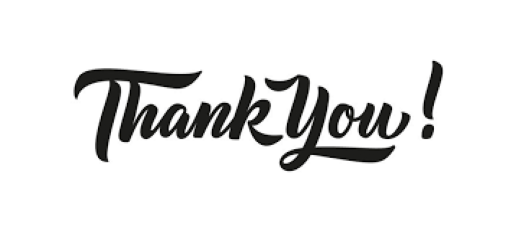

In [260]:
#Importing FSM Logo
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

image = mpimg.imread(r"C:\Users\Arnav\Desktop\FORE Documents\Thank you.png")
plt.axis(False)
plt.imshow(image)
plt.show()